# 캡스톤디자인 

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance
import matplotlib.pyplot as plt
from xgboost import plot_importance
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import datetime
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance
!pip install prophet
import pandas as pd
from prophet import Prophet
import lightgbm as lgb
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Add columns with year, month, and weekday name
merged_df['Year']         = pd.DatetimeIndex(merged_df.index).year
merged_df['Month']        = pd.DatetimeIndex(merged_df.index).month
#merged_df['Weekday Name'] = pd.DatetimeIndex(merged_df.index).weekday_name

# Display a random sampling of 5 rows
#merged_df.sample(10, random_state=0)

In [ ]:
import joblib
import lightgbm as lgb

In [ ]:
location3 = ("/content/seo_test3round.csv")
min = pd.read_csv(location3)
min.rename(columns={'Order.Date': 'Order Date'}, inplace=True)
min = min.set_index('Order Date')
min.index

Index(['2014-01-11', '2014-01-13', '2014-01-20', '2014-01-21', '2014-01-26',
       '2014-03-11', '2014-03-15', '2014-03-19', '2014-03-19', '2014-03-21',
       ...
       '2020-12-09', '2020-12-17', '2020-12-18', '2020-12-20', '2020-12-24',
       '2020-12-29', '2020-12-29', '2020-12-29', '2020-12-29', '2020-12-30'],
      dtype='object', name='Order Date', length=648)

In [ ]:
df = min
split = "2019-01-01"
df_train = df[:split]
df_test = df[split:]
df_train_y = df_train.loc[:,'Quantity']
df_train_x = df_train.drop('Quantity', axis=1)
df_test_y = df_test.loc[:,'Quantity']
df_test_x = df_test.drop('Quantity', axis=1)
df_test_orig = df_test.loc[:, ['Month','Year','Quantity','Sales','Profit','Discount']]

In [ ]:
# XGBoost 모델 불러오기
XG_model_month = joblib.load('XG_model_month.joblib')

# LightGBM 모델 불러오기
lgb_model = lgb.Booster(model_file='lgb_model.txt')

<Axes: xlabel='Order Date'>

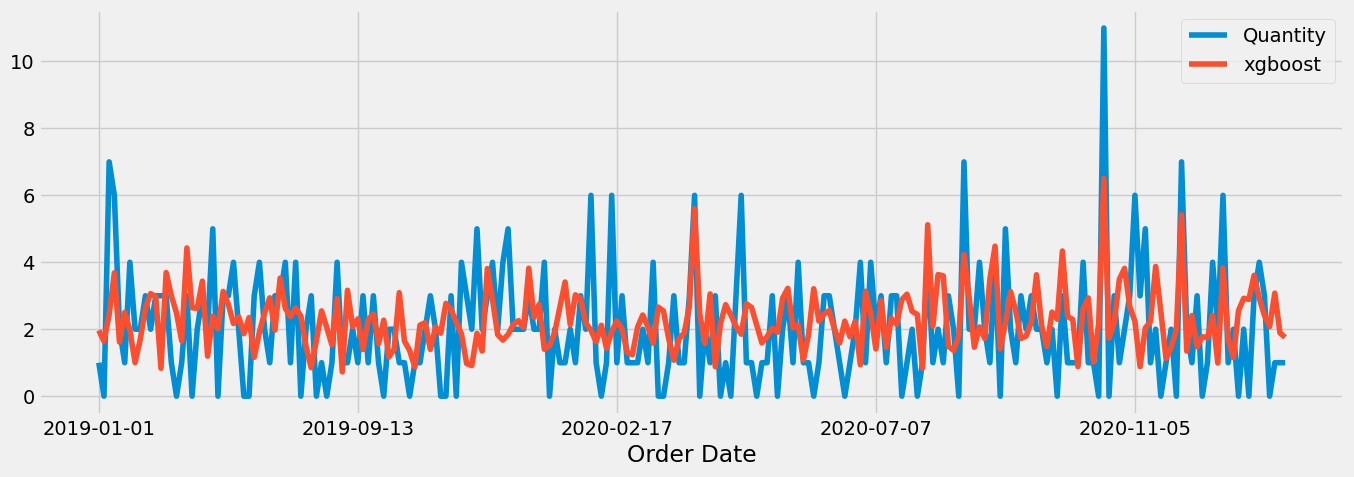

In [ ]:
xgboost = XG_model_month.predict(df_test_x)
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(xgboost, columns=['xgboost'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'xgboost']]
result.plot()

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 성능 척도 계산
r2 = r2_score(df_test_y, xgboost)
mae = mean_absolute_error(df_test_y, xgboost)
mse = mean_squared_error(df_test_y, xgboost)
rmse = mean_squared_error(df_test_y, xgboost, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: 0.03821162755380503
MAE: 1.3533888454022616
MSE: 2.7252973511568026
RMSE: 1.6508474645335354


In [ ]:
# 모델 예측
lgb_test = lgb.Dataset(data=df_test_x, label=df_test_y)

pred = lgb_model.predict(df_test_x, num_iteration=lgb_model.best_iteration)


In [ ]:
r2 = r2_score(df_test_y, pred)
mae = mean_absolute_error(df_test_y, pred)
mse = mean_squared_error(df_test_y, pred)
rmse = mean_squared_error(df_test_y, pred, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: 0.10440099004865255
MAE: 1.2642778630267861
MSE: 2.537744975343425
RMSE: 1.593030123802882


<Axes: xlabel='Order Date'>

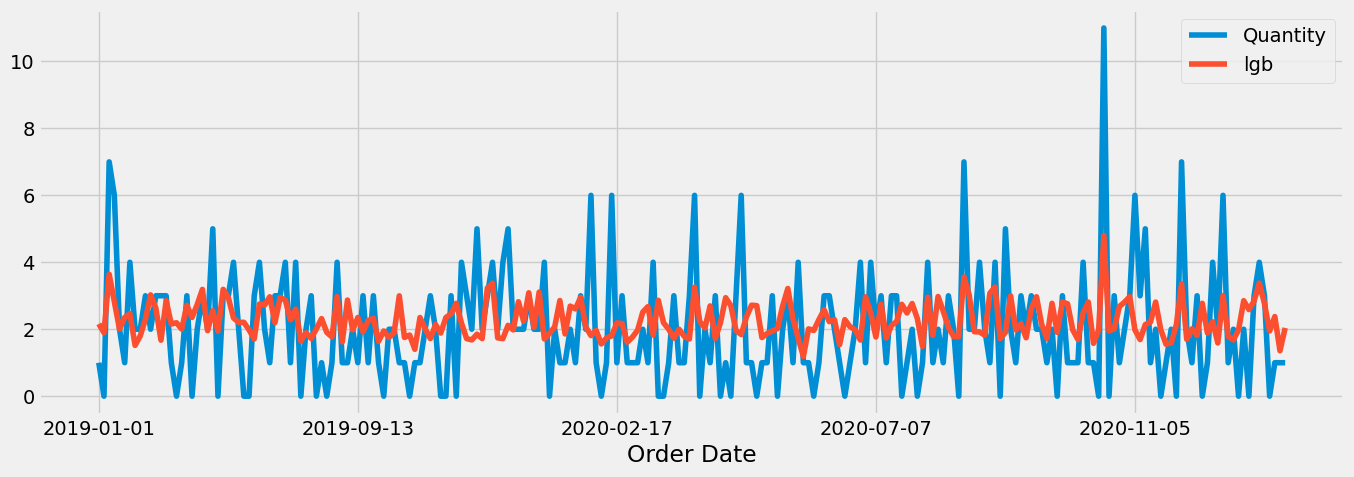

In [ ]:
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(pred, columns=['lgb'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'lgb']]
result.plot()